<a href="https://colab.research.google.com/github/dgadela/ML_HandsOn/blob/master/TensorFlowBasicImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

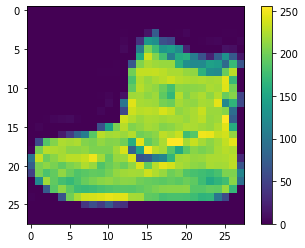

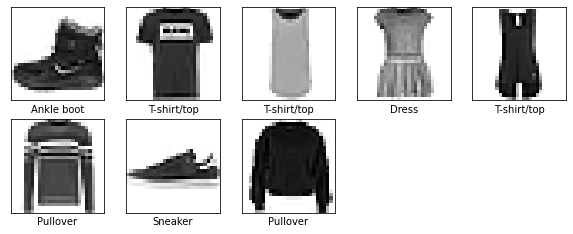

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5035 - accuracy: 0.8217
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3790 - accuracy: 0.8637
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3374 - accuracy: 0.8757
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3126 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2951 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2796 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2590 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2466 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

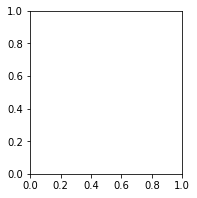

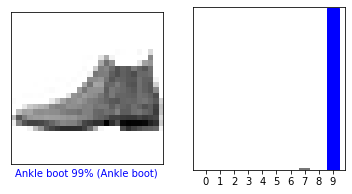

In [18]:
#import libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

#import dataset
dataset=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=dataset.load_data()
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#pre process the data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images=train_images/255.0
test_images=test_images/255.0

plt.figure(figsize=(10,10))
for i in range(8):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

#Build the model
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(128,activation='relu'),
                        keras.layers.Dense(10)
])

model.compile(optimizer='Adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=10)

test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print('\n Test accuracy:',test_acc)

probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax( )])
predictions=probability_model.predict(test_images)

np.argmax(predictions[0])

i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)

#make predictions
def plot_image(i,predictions_array,true_label,img):
  true_label,img=true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap=plt.cm.binary)
  predicted_label=np.argmax(predictions_array)
  if predicted_label==true_label:
    color='blue'
  else:
    color='red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]),color=color)

def plot_value_array(i,predictions_array,true_label):
  true_label=true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot=plt.bar(range(10),predictions_array,color="#777777")
  plt.ylim([0,1])
  predicted_label=np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#verify predictions
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()
